In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
X = pd.read_csv("LR/linearX.csv").values
Y = pd.read_csv("LR/linearY.csv").values

In [58]:
X

array([[ 8. ],
       [ 9.1],
       [ 8.4],
       [ 6.9],
       [ 7.7],
       [15.6],
       [ 7.3],
       [ 7. ],
       [ 7.2],
       [10.1],
       [11.5],
       [ 7.1],
       [10. ],
       [ 8.9],
       [ 7.9],
       [ 5.6],
       [ 6.3],
       [ 6.7],
       [10.4],
       [ 8.5],
       [ 7.4],
       [ 6.3],
       [ 5.4],
       [ 8.9],
       [ 9.4],
       [ 7.5],
       [11.9],
       [ 7.8],
       [ 7.4],
       [10.8],
       [10.2],
       [ 6.2],
       [ 7.7],
       [13.7],
       [ 8. ],
       [ 6.7],
       [ 6.7],
       [ 7. ],
       [ 8.3],
       [ 7.4],
       [ 9.9],
       [ 6.1],
       [ 7. ],
       [ 5.4],
       [10.7],
       [ 7.6],
       [ 8.9],
       [ 9.2],
       [ 6.6],
       [ 7.2],
       [ 8. ],
       [ 7.8],
       [ 7.9],
       [ 7. ],
       [ 7. ],
       [ 7.6],
       [ 9.1],
       [ 9. ],
       [ 7.9],
       [ 6.6],
       [11.9],
       [ 6.5],
       [ 7.1],
       [ 8.8],
       [ 7.5],
       [ 7.7],
       [ 6

In [59]:
X.shape

(99, 1)

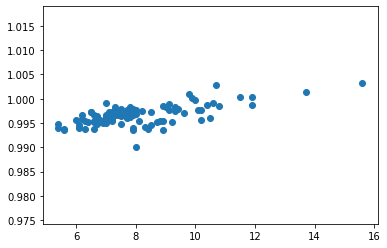

In [60]:
plt.scatter(X,y)
plt.show()

In [61]:
np.mean(X)

8.05151515151515

In [62]:
np.std(X)

1.728627857571563

In [63]:
X_norm = ( X-X.mean() ) / X.std()

In [64]:
X_norm

array([[-0.02980118],
       [ 0.60654168],
       [ 0.20159622],
       [-0.66614404],
       [-0.20334923],
       [ 4.36674951],
       [-0.43474664],
       [-0.60829469],
       [-0.49259599],
       [ 1.18503519],
       [ 1.99492611],
       [-0.55044534],
       [ 1.12718584],
       [ 0.49084298],
       [-0.08765053],
       [-1.41818561],
       [-1.01324015],
       [-0.78184275],
       [ 1.35858325],
       [ 0.25944558],
       [-0.37689729],
       [-1.01324015],
       [-1.53388431],
       [ 0.49084298],
       [ 0.78008974],
       [-0.31904794],
       [ 2.22632352],
       [-0.14549988],
       [-0.37689729],
       [ 1.58998065],
       [ 1.24288455],
       [-1.0710895 ],
       [-0.20334923],
       [ 3.26761184],
       [-0.02980118],
       [-0.78184275],
       [-0.78184275],
       [-0.60829469],
       [ 0.14374687],
       [-0.37689729],
       [ 1.06933649],
       [-1.12893885],
       [-0.60829469],
       [-1.53388431],
       [ 1.5321313 ],
       [-0

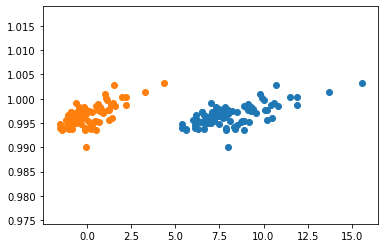

In [65]:
plt.scatter(X,Y)
plt.scatter(X_norm,Y)
plt.show()

# linear regression

In [53]:
def hypothesis(x, theta):
    """
    theta : list of th1 and th0
    
    x : input(scalar)
    """
    return theta[0] + theta[1]*x

In [66]:
def error(X,y, theta):
    """
    x : dataset (99,1)
    y : (99,1)
    theta : (2, )
    """
    m = x.shape[0]
    total_err = 0.
    
    for i in range(m):
        y_ = hypothesis(x[i], theta)
        total_err += (y_ - y[i])**2
    
    return float(total_err/m)

In [67]:
error(X, y, np.array([0,0]))

0.9932838201010109

In [75]:
def gradient(X, y, theta):
    """
    x:(99,1)
    
    """
    m = X.shape[0]
    grad = np.zeros(2)
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        grad[0] += (y_ - y[i])
        grad[1] += (y_ - y[i]) * X[i]
        
    return grad/m    

In [106]:
def gdescent(X, y, lr= 1, max_itr = 100):
    m = X.shape[0]
    
    theta = np.zeros(2)
    losses=[]
    
    for i in range(max_itr):
        
        e = error(X, y, theta)
        
        losses.append(e)
        
        grad = gradient(X, y, theta)
        
        theta[0] = theta[0]  - lr*grad[0]
        theta[1] = theta[1]  - lr*grad[1]
        
    return theta, losses    

In [107]:
Theta,Losses = gdescent(X_norm,y)

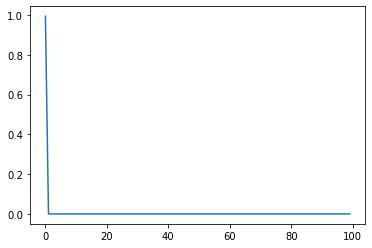

In [108]:
plt.plot(Losses)
plt.show()

In [109]:
x_test = np.array([-1,0,1,2,3,4,5])

In [110]:
y_pred = hypothesis(x_test, Theta)

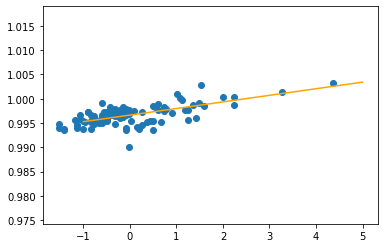

In [111]:
plt.scatter(X_norm,y)
plt.plot(x_test, y_pred, color="orange")

# sklearn

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lin_reg = LinearRegression()

In [114]:
lin_reg.fit(X_norm, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
lin_reg.coef_

array([[0.00135794]])

In [116]:
lin_reg.intercept_

array([0.99663414])

In [117]:
lin_reg.predict(x_test.reshape((-1,1)))

array([[0.9952762 ],
       [0.99663414],
       [0.99799208],
       [0.99935002],
       [1.00070796],
       [1.0020659 ],
       [1.00342384]])

# diff models in SKlearn

In [118]:
from sklearn.svm import SVR

In [119]:
model = SVR()
model.fit(X_norm, y)

c:\users\dhrit\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)